In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['figure.figsize'] = (20, 12)

In [19]:
cap = pd.read_excel("capienze.xlsx")
# pres = pd.read_excel("presenti.xlsx")
suic = pd.read_excel("suicidi.xlsx")
# display(pres)
# display(suic)

In [20]:
cap_transformed = cap.T
cap_transformed.columns = ['Capienza']

# https://www.senato.it/japp/bgt/showdoc/17/DOSSIER/0/1011783/index.html?part=dossier_dossier1
capienze_passate = pd.DataFrame({'Capienza': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42952, 42824, 43186, 43066, 44073]})

# https://www.antigone.it/upload2/uploads/docs/Reportfine2024.pdata
capienza_2024 = pd.DataFrame({'Capienza': [51320]})

cap_transformed = pd.concat([capienze_passate, cap_transformed, capienza_2024])
cap_transformed = cap_transformed[cap_transformed['Capienza'] != 'Italia']

In [21]:
data = pd.concat([suic['Anni'], suic['Presenza media detenuti'], suic['Suicidi valore assoluto'], suic['Decessi per cause naturali valore assoluto'], cap_transformed.reset_index(drop=True)], axis=1)

data.rename(columns={'Anni': 'Anno', 'Presenza media detenuti': 'Presenze', 'Suicidi valore assoluto': 'Suicidi', 'Decessi per cause naturali valore assoluto': 'Decessi'}, inplace=True)

data['Anno'] = data['Anno'].astype(str)
data['Capienza'] = data['Capienza'].astype(int)

# data = data[data['Capienza'] != 0]

display(data)

,Anno,Presenze,Suicidi,Decessi,Capienza
0,1992,44134,47,89,0
1,1993,50903,61,111,0
2,1994,52641,50,86,0
3,1995,50448,50,79,0
4,1996,48528,45,78,0
5,1997,49306,55,67,0
6,1998,49559,51,78,0
7,1999,51072,53,83,0
8,2000,53338,56,104,0
9,2001,55193,69,108,0


In [22]:
# --------------------------
# 2. Creazione della variabile sovraffollamento
# --------------------------

# Calcolo della variabile 'Occupazione' con gestione dei valori infiniti
data['Occupazione'] = data['Presenze'] / data['Capienza']
data['Occupazione'] = np.where(np.isinf(data['Occupazione']), 0, data['Occupazione'])
display(data)

,Anno,Presenze,Suicidi,Decessi,Capienza,Occupazione
0,1992,44134,47,89,0,0.000000
1,1993,50903,61,111,0,0.000000
2,1994,52641,50,86,0,0.000000
3,1995,50448,50,79,0,0.000000
4,1996,48528,45,78,0,0.000000
5,1997,49306,55,67,0,0.000000
6,1998,49559,51,78,0,0.000000
7,1999,51072,53,83,0,0.000000
8,2000,53338,56,104,0,0.000000
9,2001,55193,69,108,0,0.000000


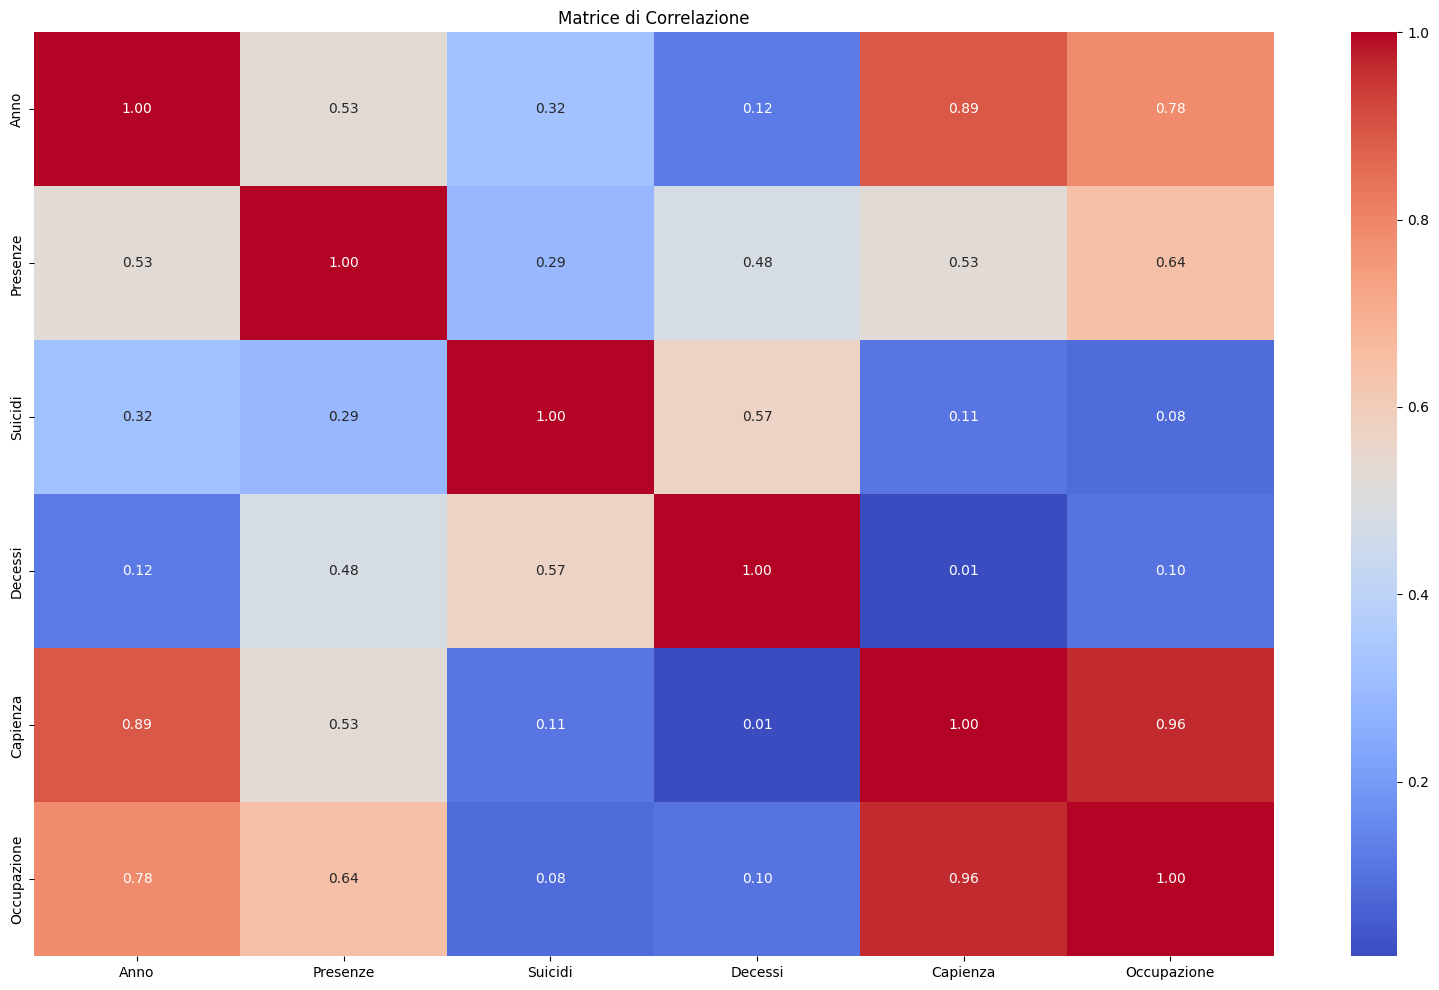

In [23]:
# Calcolo della matrice di correlazione
corr_matrix = data.corr()

# Visualizzazione della heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

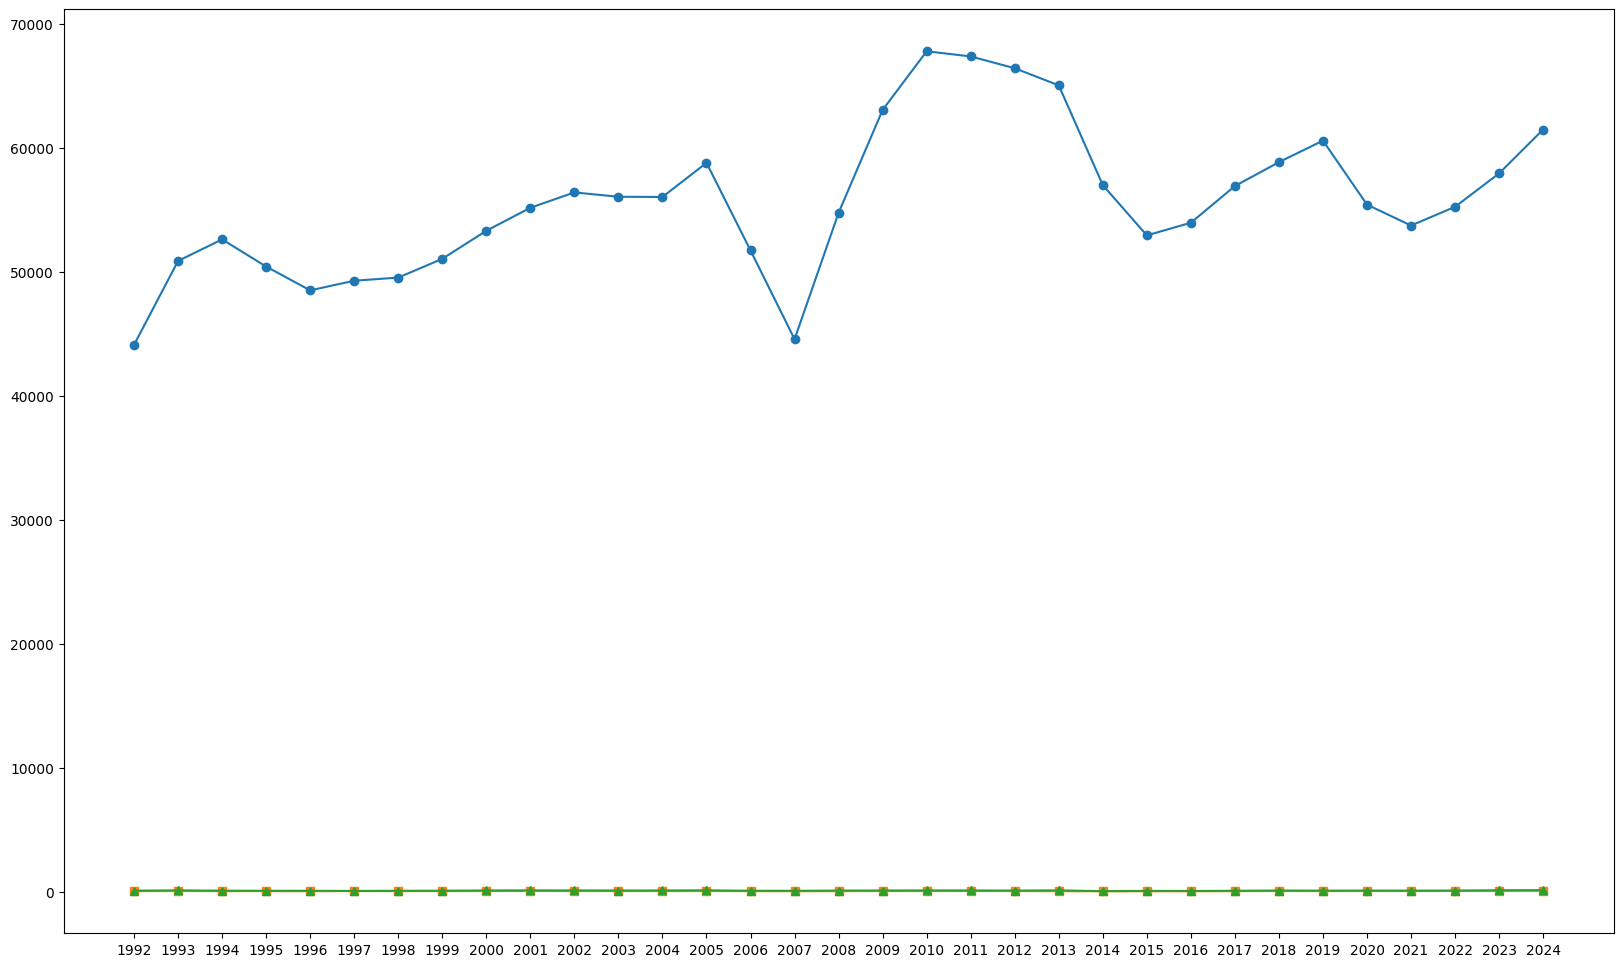

In [24]:
# A. Andamento temporale di Presenze, Suicidi, Decessi e Capienza (tutti gli anni)
plt.figure()
plt.plot(data['Anno'], data['Presenze'], label='Presenze', marker='o')
plt.plot(data['Anno'], data['Suicidi'], label='Suicidi', marker='s')
plt.plot(data['Anno'], data['Decessi'], label='Decessi', marker='^')

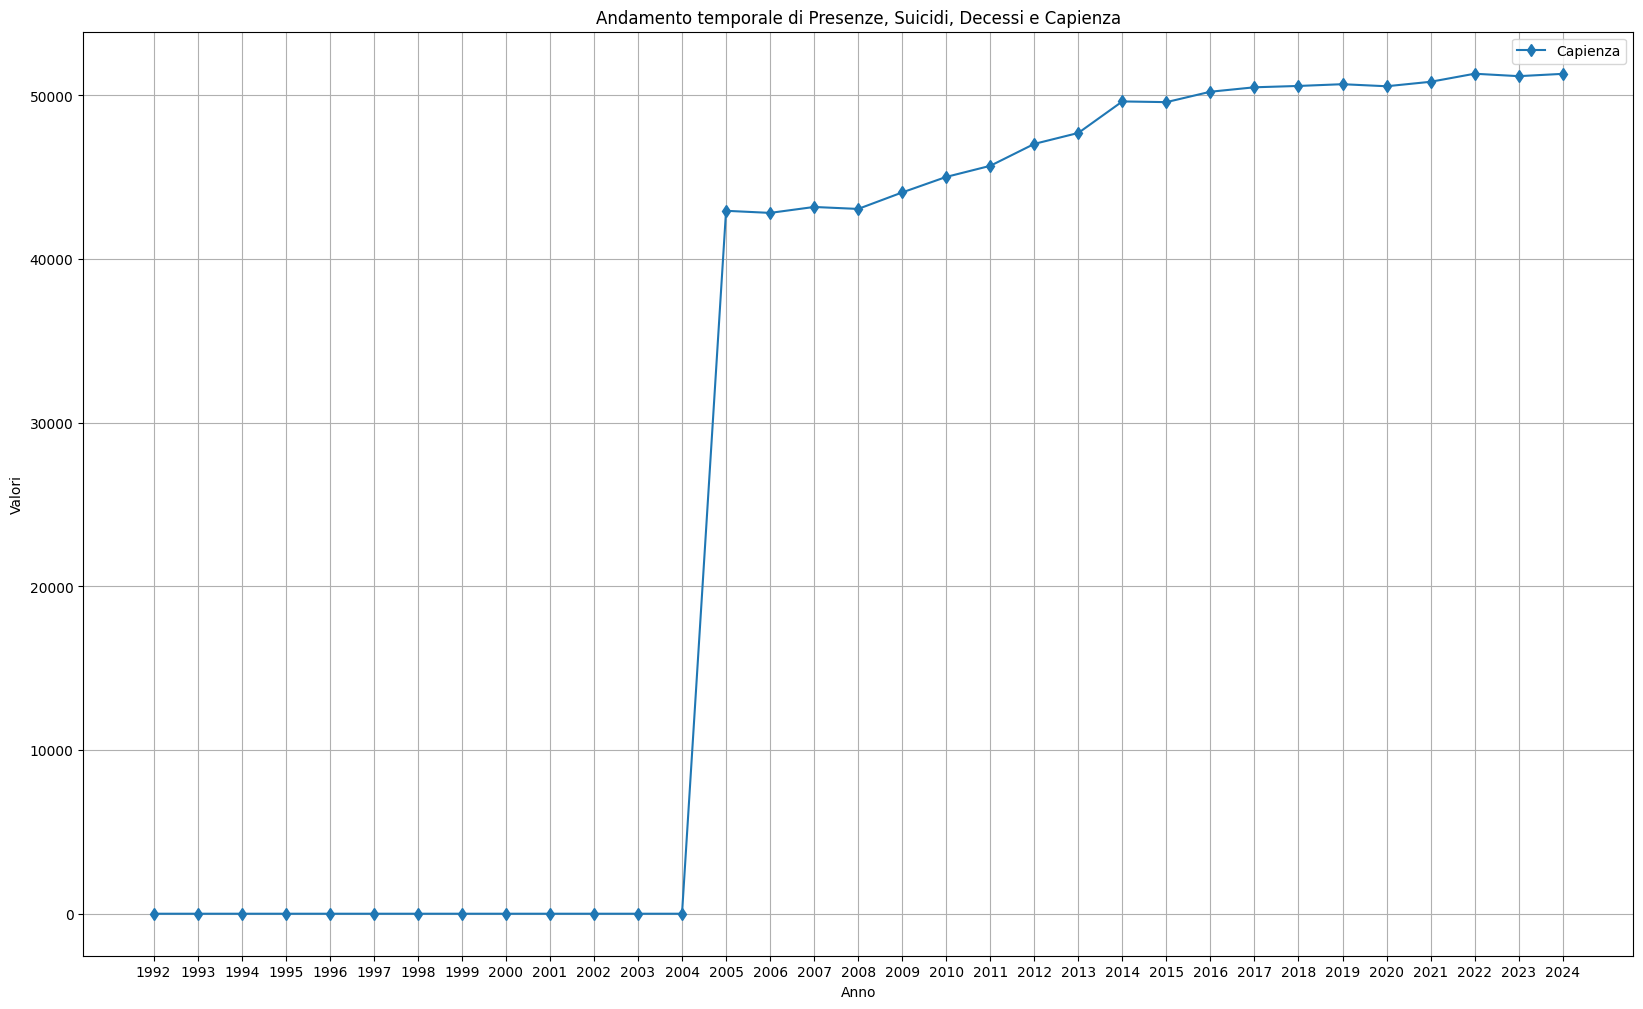

In [25]:
# Per Capienza, plottiamo solo dove è > 0
# data_capienza = data[data['Capienza'] > 0]
plt.plot(data['Anno'], data['Capienza'], label='Capienza', marker='d')
plt.xlabel('Anno')
plt.ylabel('Valori')
plt.title('Andamento temporale di Presenze, Suicidi, Decessi e Capienza')
plt.legend()
plt.grid(True)
plt.show()

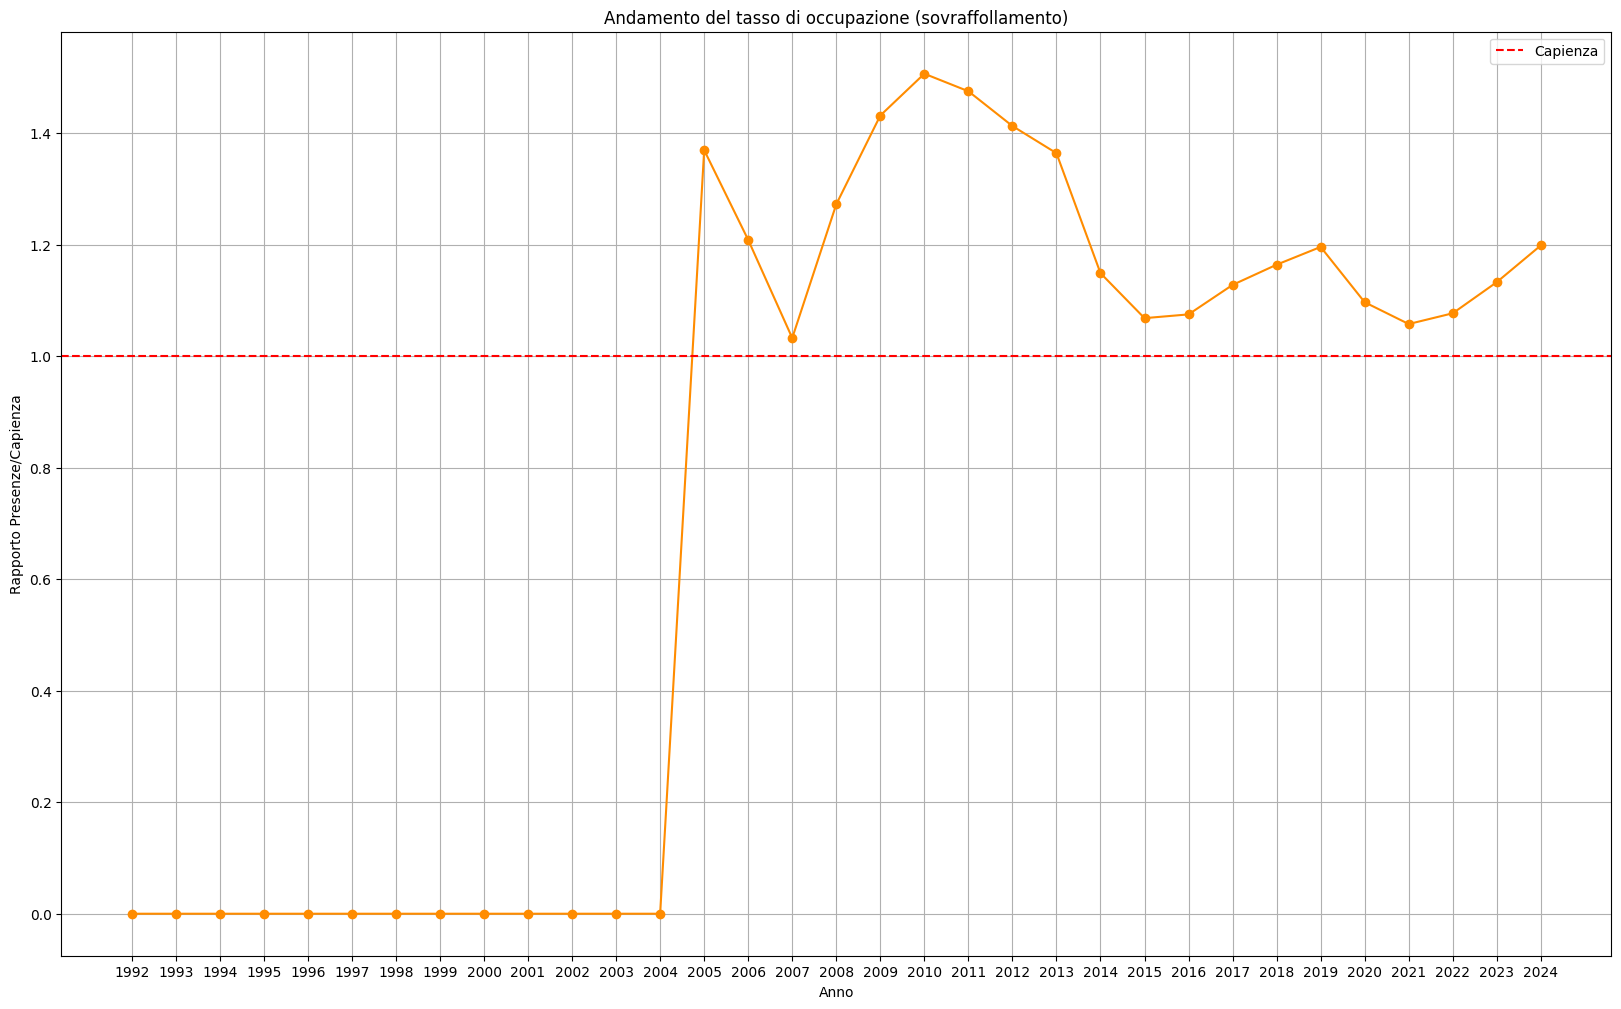

In [26]:
# B. Andamento temporale del tasso di occupazione (dal 2005 in poi)
plt.figure()
plt.plot(data['Anno'], data['Occupazione'], marker='o', color='darkorange')
plt.axhline(1, color='red', linestyle='--', label='Capienza')
plt.xlabel('Anno')
plt.ylabel('Rapporto Presenze/Capienza')
plt.title('Andamento del tasso di occupazione (sovraffollamento)')
plt.legend()
plt.grid(True)
plt.show()

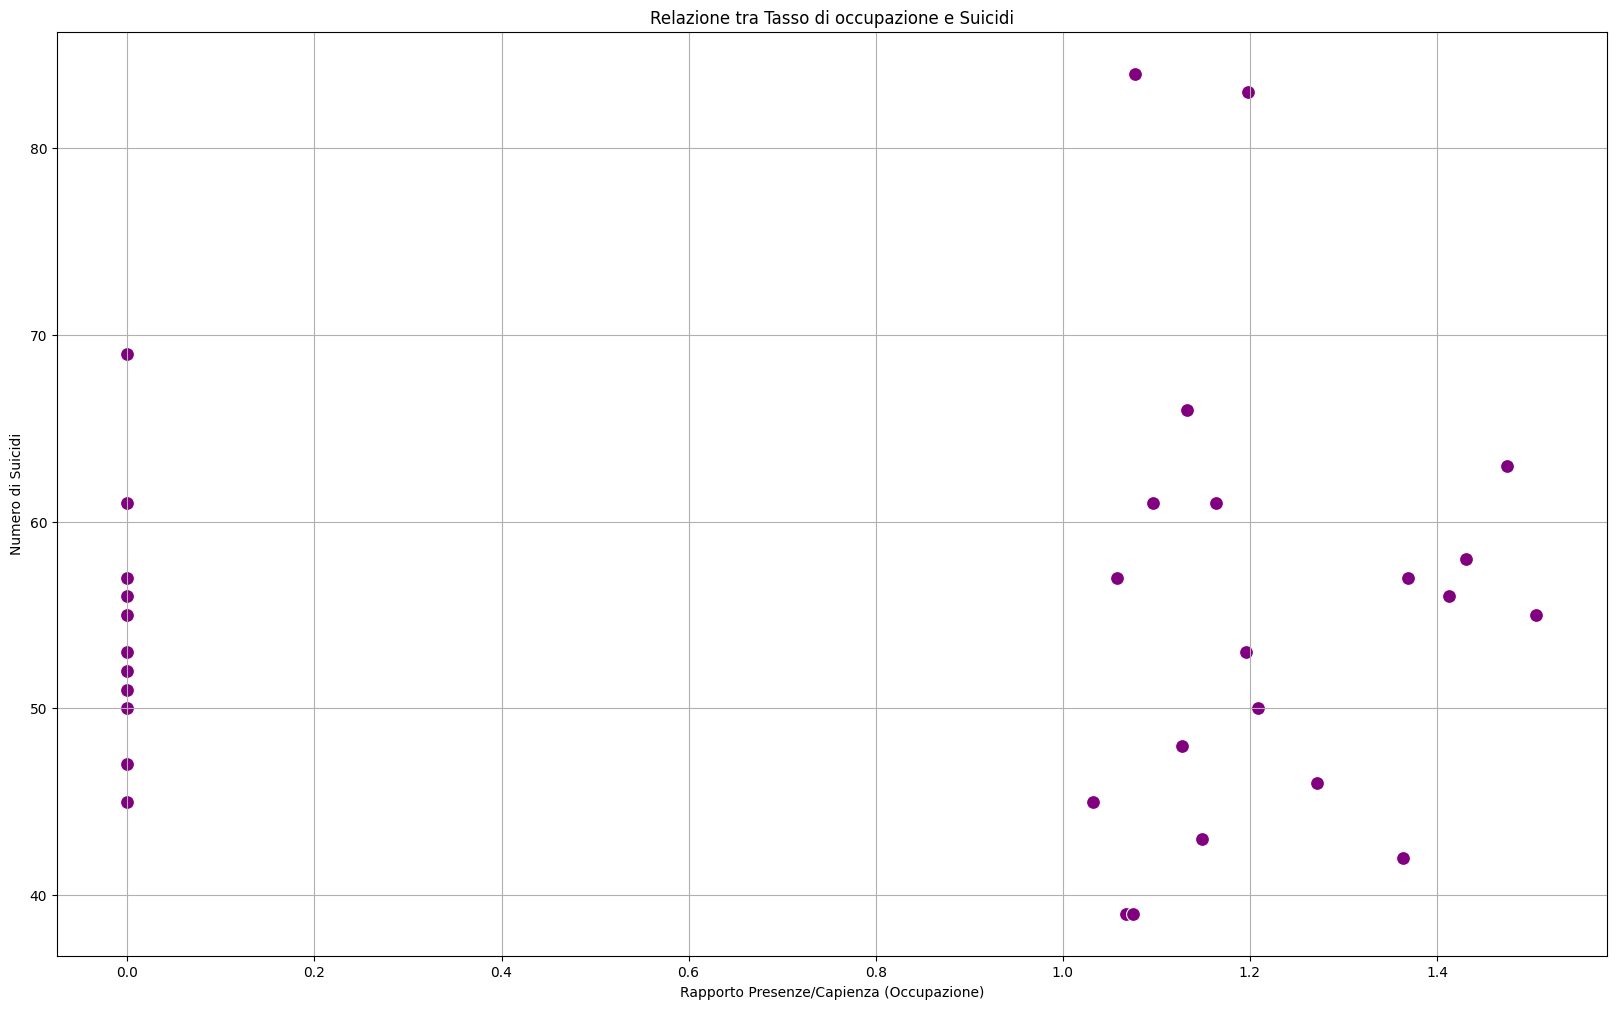

In [27]:
# C. Scatter plot: Tasso di occupazione vs. Suicidi
plt.figure()
sns.scatterplot(data=data, x='Occupazione', y='Suicidi', s=100, color='purple')
plt.xlabel('Rapporto Presenze/Capienza (Occupazione)')
plt.ylabel('Numero di Suicidi')
plt.title('Relazione tra Tasso di occupazione e Suicidi')
plt.grid(True)
plt.show()

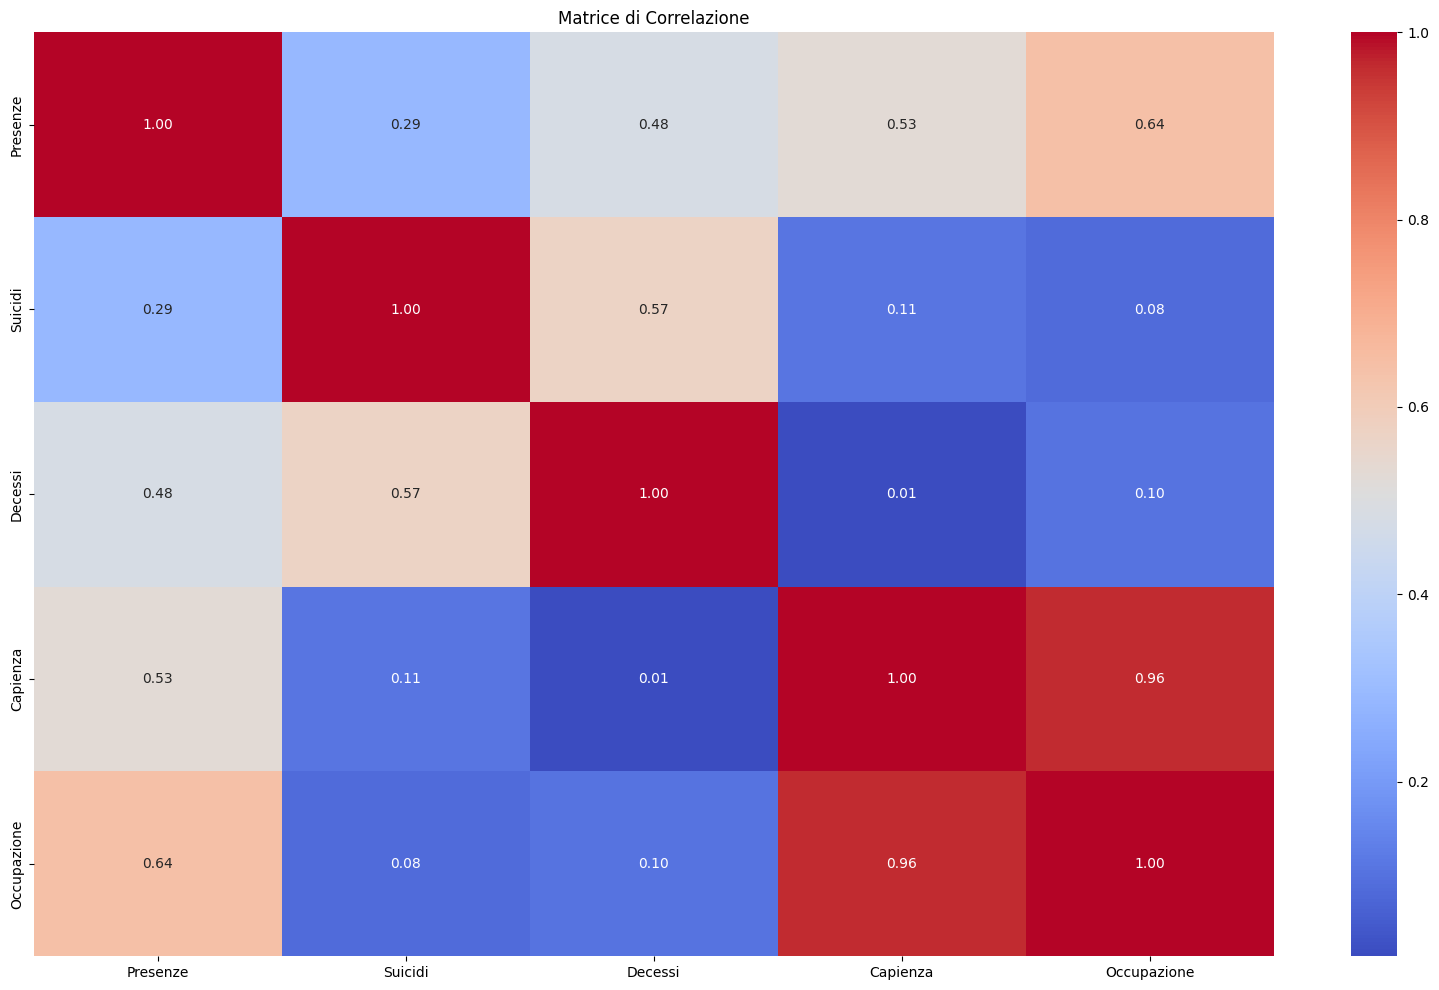

In [28]:
# D. Heatmap della matrice di correlazione (usando le variabili di interesse)
cols_corr = ['Presenze', 'Suicidi', 'Decessi', 'Capienza', 'Occupazione']
corr_matrix = data[cols_corr].corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

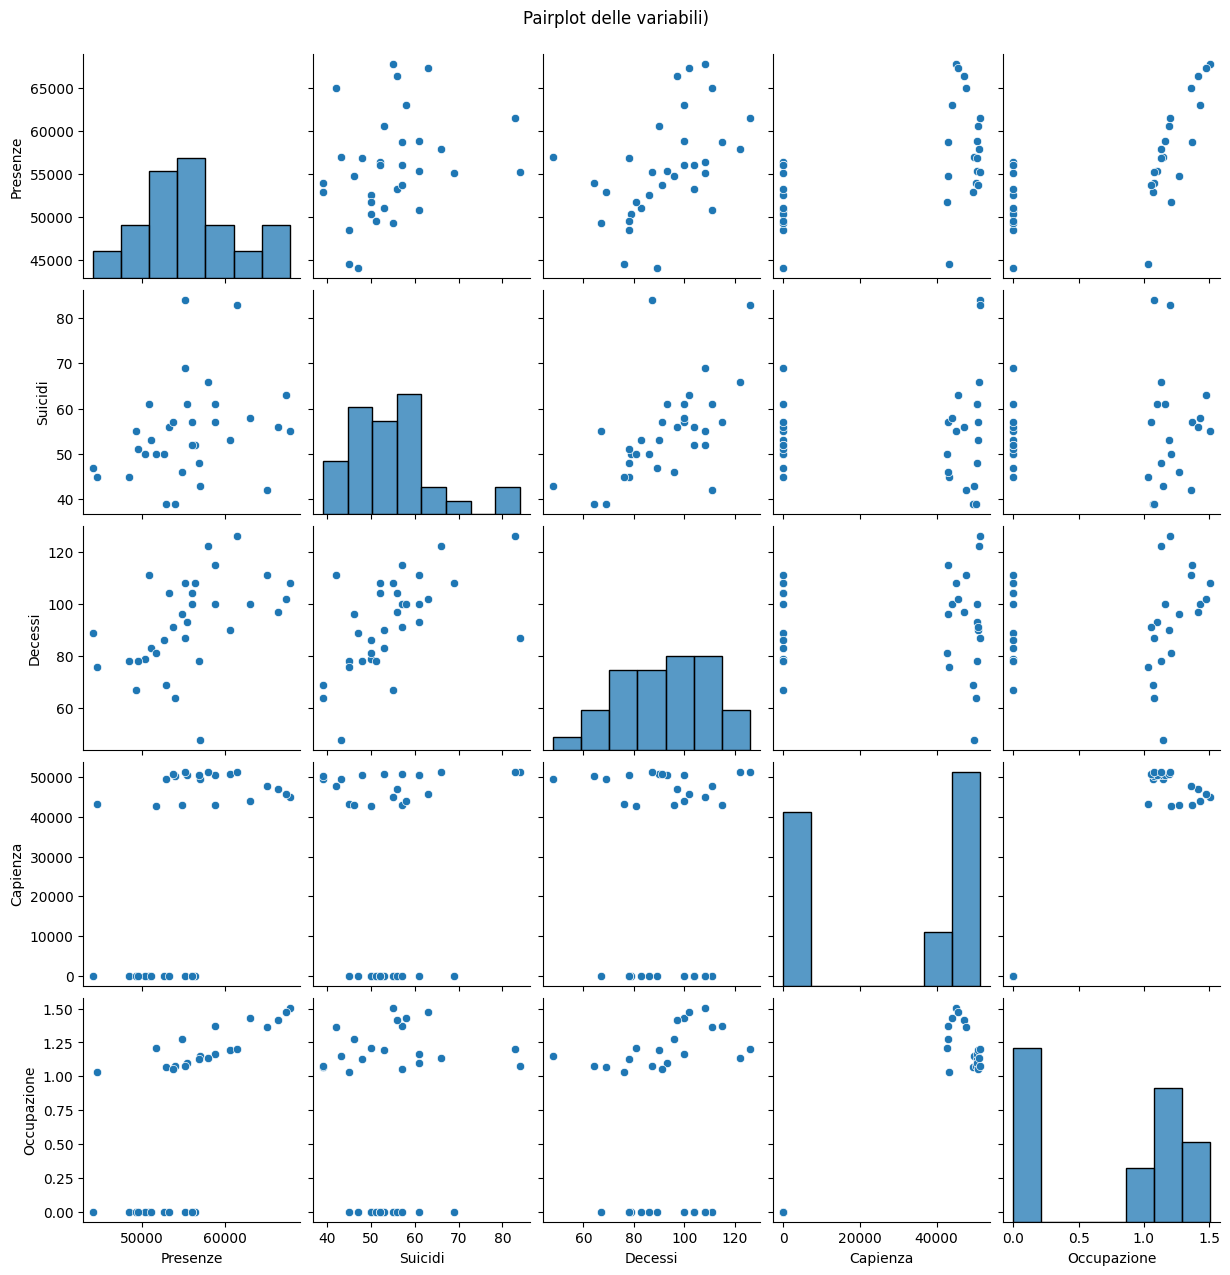

In [29]:
# E. Pairplot per vedere le relazioni bivariate
sns.pairplot(data[cols_corr])
plt.suptitle('Pairplot delle variabili)', y=1.02)
plt.show()

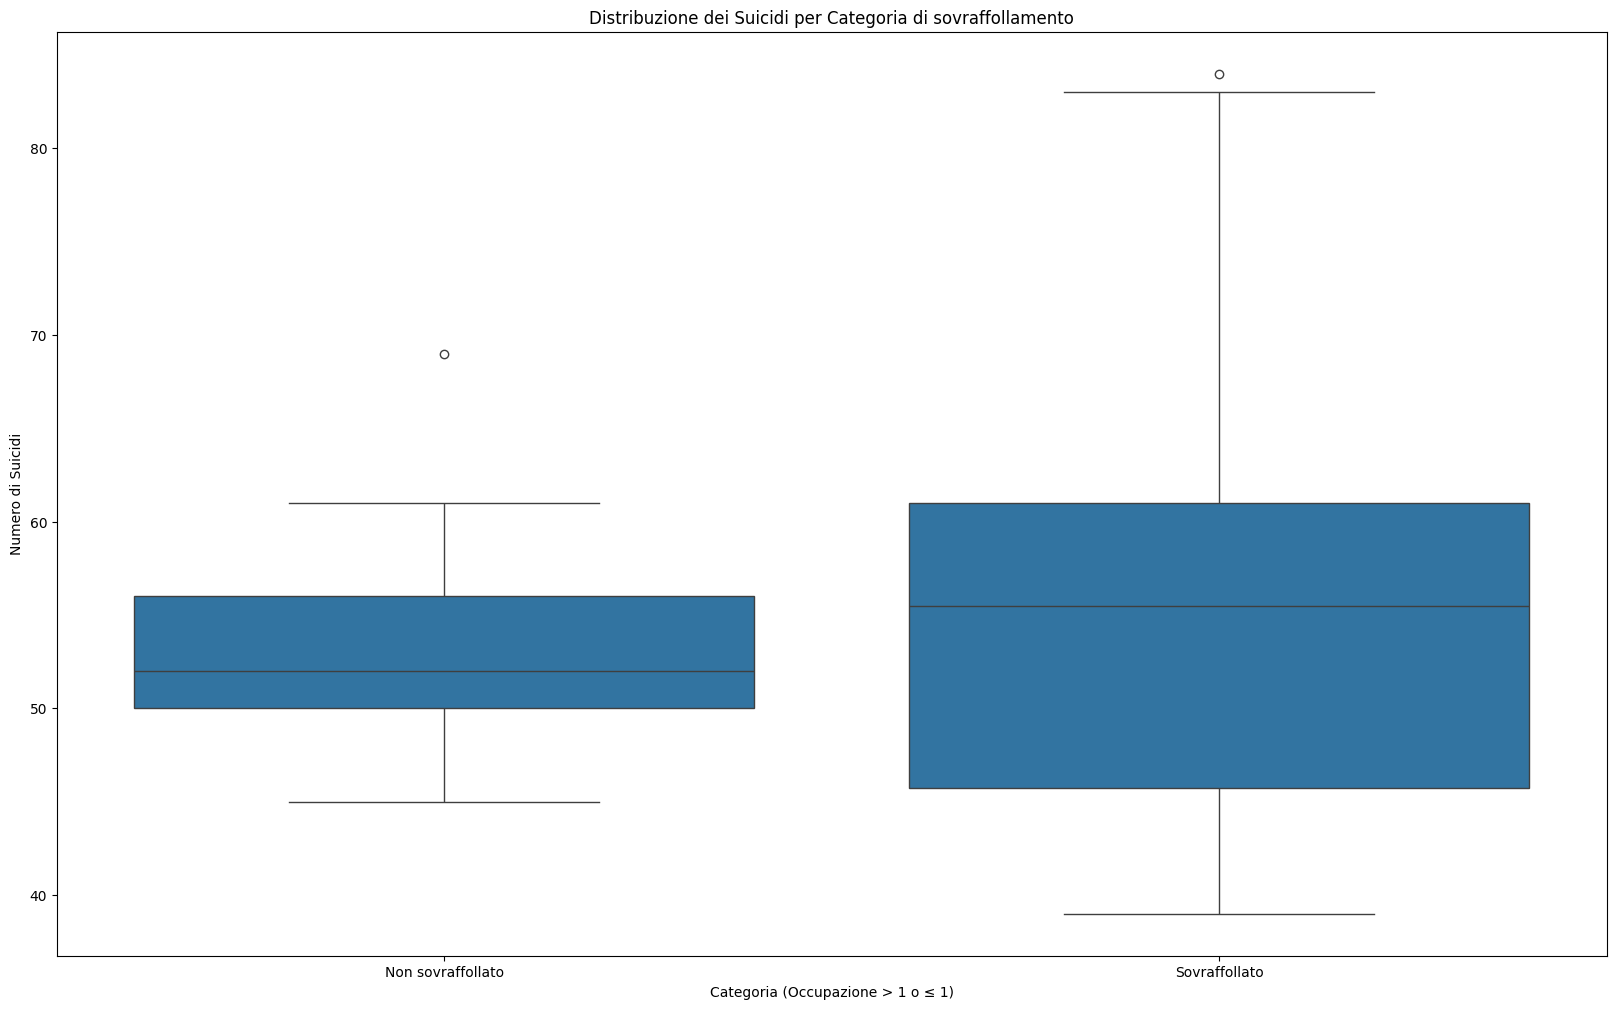

In [30]:
# F. Boxplot: Confronto della distribuzione dei suicidi 
# suddividendo le osservazioni in base al fatto che il rapporto di occupazione sia > 1 (sovraffollato) o <= 1 (non sovraffollato)
data['Categoria'] = np.where(data['Occupazione'] > 1, 'Sovraffollato', 'Non sovraffollato')
plt.figure()
sns.boxplot(x='Categoria', y='Suicidi', data=data)
plt.xlabel('Categoria (Occupazione > 1 o ≤ 1)')
plt.ylabel('Numero di Suicidi')
plt.title('Distribuzione dei Suicidi per Categoria di sovraffollamento')
plt.show()

In [31]:
# --------------------------
# 4. Analisi Statistica per la Validità dello Studio
# --------------------------

# Possiamo utilizzare una regressione lineare per valutare la relazione tra il tasso di occupazione e il numero di suicidi.
# La formulazione base del modello sarà:
# Suicidi = beta0 + beta1 * Occupazione + errore

# A. Regressione lineare con statsmodels
# Aggiungiamo una costante per il termine di intercetta:
X = sm.add_constant(data['Occupazione'])
y = data['Suicidi']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Suicidi   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2238
Date:                Wed, 09 Apr 2025   Prob (F-statistic):              0.640
Time:                        11:26:40   Log-Likelihood:                -123.52
No. Observations:                  33   AIC:                             251.0
Df Residuals:                      31   BIC:                             254.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          53.6098      2.891     18.542      

In [32]:
# B. Test di correlazione: coefficiente di Pearson e p-value
corr_coef, p_value = stats.pearsonr(data['Occupazione'], data['Suicidi'])
print("\nCoefficiente di Pearson:", corr_coef)
print("p-value:", p_value)

# In base al p-value (e al summary della regressione), potrai valutare se l'associazione tra sovraffollamento (Occupazione) e suicidi è statisticamente significativa.
# Comunemente, un p-value < 0.05 viene considerato come indicativo di significatività statistica.


Coefficiente di Pearson: 0.08465324323387674
p-value: 0.6395075776043027


In [33]:
# --------------------------
# Codice Extra: Analisi multivariata (opzionale)
# --------------------------
# Se vuoi controllare anche altre variabili, ad esempio includendo 'Decessi' come co-variabile:
formula = 'Suicidi ~ Occupazione + Presenze'
model_multi = smf.ols(formula=formula, data=data).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                Suicidi   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.693
Date:                Wed, 09 Apr 2025   Prob (F-statistic):              0.201
Time:                        11:26:40   Log-Likelihood:                -121.87
No. Observations:                  33   AIC:                             249.7
Df Residuals:                      30   BIC:                             254.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.7794     20.392      0.872      

### Conclusioni Analitiche

Dall'analisi statistica eseguita, sia attraverso la regressione lineare univariata che il test di correlazione di Pearson, emerge che il tasso di occupazione (rapporto Presenze/Capienza) non risulta avere un effetto statisticamente significativo sul numero dei suicidi (p-value ≈ 0.64 e coefficiente di correlazione ≈ 0.085). Anche l'analisi multivariata, che ha incluso la variabile "Presenze", non ha evidenziato un'associazione significativa, evidenziando potenzialmente il ruolo di altre variabili non considerate o la presenza di multicollinearità. Pertanto, sulla base dei dati attualmente disponibili, non possiamo supportare l'ipotesi secondo cui il sovraffollamento delle carceri rappresenterebbe una causa determinante per l'insorgenza dei suicidi al suo interno.

In [34]:
# --------------------------------------------------------
# 1. Calcolo del VIF per identificare multicollinearità
# --------------------------------------------------------

# Consideriamo le variabili indipendenti del modello: "Occupazione" e "Presenze".
X = data[['Occupazione', 'Presenze']]
X = sm.add_constant(X)  # aggiungiamo l'intercetta

# Calcoliamo il VIF per ogni variabile
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

# I valori di VIF per 'Occupazione' e 'Presenze' indicano che la multicollinearità
# non è un problema serio (tipicamente valori inferiori a 5 o 10 sono considerati accettabili).

Variance Inflation Factor (VIF):
       feature         VIF
0        const  132.052658
1  Occupazione    1.705166
2     Presenze    1.705166
